# 1 什么是聚类

将物理或抽象对象的集合分成由类似的对象组成的多个类的过程被称为聚类。由聚类所生成的簇是一组数据对象的集合，这些对象与同一个簇中的对象彼此相似，与其他簇中的对象相异。它是一种探索性的数据挖掘活动，是统计数据分析的常用技术，广泛应用于机器学习、模式识别、图像分析、信息检索、生物信息学、数据压缩和计算机图形学等领域。聚类的一些常见的实际使用案例有：

- 根据购买历史或兴趣进行客户细分，设计有针对性的营销方案。
- 根据标记、主题和文档内容将文档分为多个类别。
- 分析社会/生命科学实验的结果，找出数据中的自然分组和模式。

# 2 实例数据集

数据为某商场会员基本信息，包括
- CustomerID（客户ID）
- Gender（性别）
- Age（年龄）
- Annual Income (千美元)（年收入）
- Spending Score (1-100)（消费得分：根据顾客消费行为，例如客户行为和购买数据商场的评分）

通过已有信息对客户进行细化分类，以便营销运营团队更好的制定策略。

#### 数据集来源
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

# 3 数据预处理

In [1]:
#导入数据分析需要的包
import pandas as pd
import numpy as np

#可视化包
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#忽略警告信息
import warnings
warnings.filterwarnings('ignore')

#读取数据
df=pd.read_csv('./data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
# 使用profile检查数据分布
import pandas_profiling
pfr = pandas_profiling.ProfileReport(df)
pfr.to_file('report.html')
pfr

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

结合profile及以下代码，完成数据清洗工作，确认数据无空值、重复值与异常值.
其中首先将类别变量性别转为数值变量。

In [4]:
# 将性别变量转为数值类型
Gender_mapping = {'Male': 0, 'Female': 1}
df['Gender_int']=df['Gender'].map(Gender_mapping)

In [5]:
# 数据空值检验
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_int                0
dtype: int64

In [6]:
# 数据重复值检验
df.duplicated().sum()

0

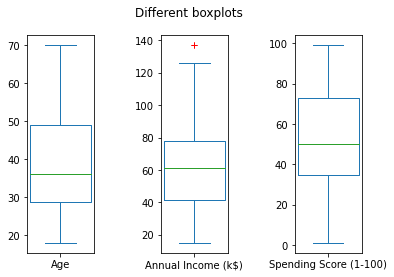

In [7]:
# 数据异常值检验
fig,axes = plt.subplots(1,3)
# 选定绘制箱型图数据列
axes_list  = ['Age','Annual Income (k$)','Spending Score (1-100)']
# 绘制箱型图
df[axes_list].plot(kind='box',ax=axes,subplots=True,title='Different boxplots',sym='r+',widths=3)
# 调整子图之间的间距
fig.subplots_adjust(wspace=1,hspace=1) 

至此完成数据清洗工作，数据无空值、重复值，异常值作为年收入数据，可以接受。因此，数据结构比较简单，原数据不需要进行过多处理。

# 4 数据可视化分析
## 4.1 预览数据分布

以性别变量作为颜色区分，绘制可视化数据

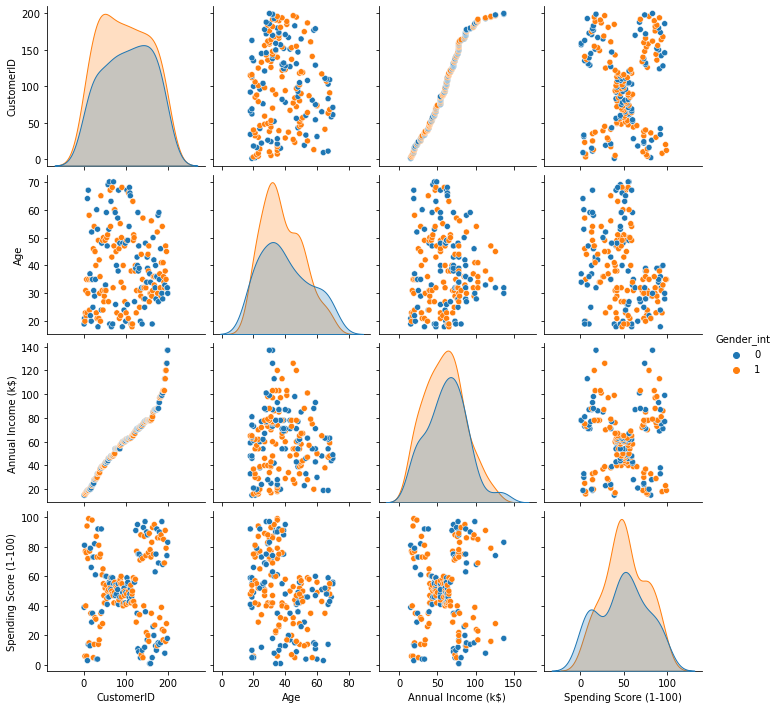

In [8]:
sns.pairplot(df,hue="Gender_int")

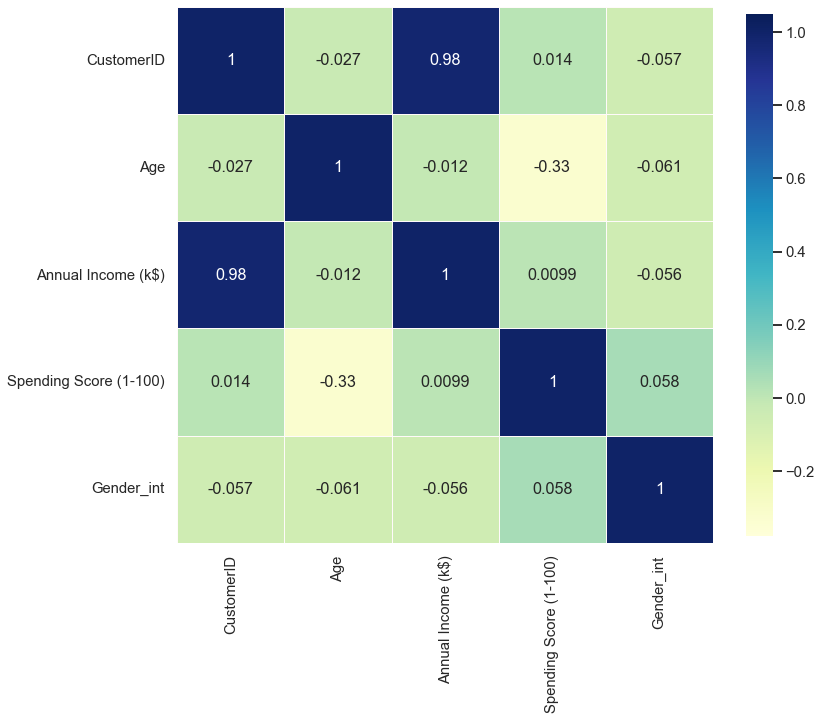

In [9]:
# 计算相关系数矩阵
corr_mtx = df.corr()

# 设置图片格式
sns.set( context='talk', style='whitegrid', font_scale=0.9) 
plt.figure(figsize=(12, 12))

# 绘制线管系数矩阵
ax = sns.heatmap(data=corr_mtx, annot=True, square=True, linewidths=1, linecolor='snow', 
                 vmin=np.nanmin(corr_mtx)-0.05, vmax=np.nanmax(corr_mtx)+0.05,
                 cbar_kws={"shrink": .8},cmap="YlGnBu")


## 2.2不同性别在各变量之间的关系
从上图中，大体能看出每个变量之间相关分布以及相关关系。其中ID与年收入之间的强线性关系通过分析可知为数据升序排列编号所致，其余数据间并无明显关系。

结合数据特性，以性别变量作为类别划分，将除ID外四列数据进行可视化呈现如下

In [ ]:
import plotly.express as px
df['marker']=1
fig = px.scatter_3d(df, x='Spending Score (1-100)', y='Annual Income (k$)', z='Age',opacity=0.7, 
                    size = 'marker',size_max=8,color='Gender')
fig.show()

通过观察上方三维视图以及之前的相关性系数图，我们能够注意到性别变量与数据分布无太多相关分析，因此不作为研究重点。这点在后期完成聚类分析时亦可有所体现。

下面的性别变量与其余变量之间的分布关系本质上是上方三维视图在在各个平面上的投影，亦可得出相同的结论。

In [ ]:
#不同性别在年龄与年收入之间的关系
plt.figure(1,figsize=(10,5))
for gender in ['Male','Female']:  
    plt.scatter(x='Age',y='Annual Income (k$)',data=df[df['Gender']==gender],
               s=200,alpha=0.5,label=gender)
plt.xlabel('Age'),plt.ylabel('Annual Income (k$)') 
plt.legend() 


In [ ]:
#不同性别在年龄与消费指数之间的关系
plt.figure(1,figsize=(10,5))
for gender in ['Male','Female']:  
    plt.scatter(x='Age',y='Spending Score (1-100)',data=df[df['Gender']==gender],
               s=200,alpha=0.5,label=gender)
plt.xlabel('Age'),plt.ylabel('Spending Score (1-100)') 
plt.legend() 
plt.show()

In [ ]:
#不同性别在年收入与消费得分之间的关系
plt.figure(1,figsize=(10,5))
for gender in ['Male','Female']:  
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df[df['Gender']==gender],
               s=200,alpha=0.5,label=gender)
plt.xlabel('Annual Income (k$)'),plt.ylabel('Spending Score (1-100)') 
plt.legend() 
plt.show()

# 5 K-Means聚类分析
## 5.1 寻找最佳聚类个数——The Elbow Method手肘法则

In [ ]:
# 选取字段
df1=df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
# 导入包
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):  
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(df1)
    inertia.append(km.inertia_)
plt.plot(range(1,11),inertia,'o-')

利用手肘法，通过图形发现，拐点在6这个位置，即最佳聚类个数为6。

## 5.2 降维

In [ ]:
# 固定数据数种子，实现数据复现
np.random.seed(1)

# 设定聚类族数为6
cluster = KMeans(n_clusters=6) 
# 在数据集的所选数据列上进行聚类器训练
cluster.fit(df1)

from sklearn import manifold 
# 定义降维容器
tsne = manifold.TSNE()   
# 进行数据降维
tsne_data = tsne.fit_transform(df1)
# 为降维后的数据列设置列名
tsne_df = pd.DataFrame(tsne_data,columns=['col1','col2'])
# 为数据添加聚类器预测标签
tsne_df.loc[:,'label']=cluster.predict(df1)
df['label']=tsne_df['label']
# 绘图
sns.scatterplot(x = 'col1',y='col2',hue='label',data=tsne_df)

通过降维，将三维立体图降维为平面图，上图6个不同颜色代表6个不同的人群，因为K-Means是无监督学习，主要负责把特征比较明显的用户归为一类，具体每一类分别代表什么群体，需要我们自己进行分析，下面会有讲述。

## 5.3 评估聚类结果

聚类后的数据可视化呈现

In [ ]:
fig = px.scatter_3d(df, x='Spending Score (1-100)', y='Annual Income (k$)', z='Age',opacity=0.7, 
                    size = 'marker', size_max=10, color='label', symbol='Gender')
fig.show()

In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(df1,tsne_df.loc[:,'label'])
print('聚类个数为6时，轮廓函数:' , score)

轮廓函数为：0.45，聚类效果较好。

PS：轮廓系数取值为[-1, 1]，其值越大越好，且当值为负时，表明样本被分配到错误的簇中，聚类结果不可接受。对于接近0的结果，则表明聚类结果有重叠的情况。

## 5.4 聚类人群分析

In [ ]:
cluster_centers=cluster.cluster_centers_
result = pd.DataFrame(data=cluster_centers,
          columns = ['Age','Annual Income(k$)','Spending Score(1-100)']).reset_index(drop= True)
result.plot(kind='bar',color=['C1','C2','C3'],clip_on=False,alpha = 0.5)

- 0组：平均年龄40岁左右，收入>80千美元，消费分20左右（谨慎消费人群：中年为主，收入很高但消费得分较低）
- 1组：平均年龄30岁左右，收入>80千美元，消费分>80（重要价值人群：中年为主，收入和消费得分都很高，属于最优客户群体）
- 2组：平均年龄25岁左右，收入60千美元左右，消费分50左右（重要发展人群：青年为主，收入和消费得分居中，潜力大）
- 3组：平均年龄40岁左右，收入30千美元左右，消费分20左右（一般价值人群：中年为主，收入和消费得分都较低）
- 4组：平均年龄55岁左右，收入55千美元左右，消费分50左右（重要保持人群：中老年为主，收入和消费得分居中）
- 5组：平均年龄25岁左右，收入25千美元左右，消费分>80（冲动消费人群：青年为主，收入一般但消费得分较高）


In [ ]:
#把得到的聚类标签添加到原数据集
df['cluster'] = cluster.labels_
#查看各类人群各自占比
df['cluster'].value_counts(1)

结果得到，4组（重要保持客户）人数最多，占比22.5%；3组（一般价值客户）人数最少，占比10.5%。

至此我们已经把所有客户细分为6类，针对不同客户特征，可以制定不同的营销运营策略，使运营效果最大化。